In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [150]:
bp=pickle.load(open("ab-initio/bands_data.pickle","rb"))

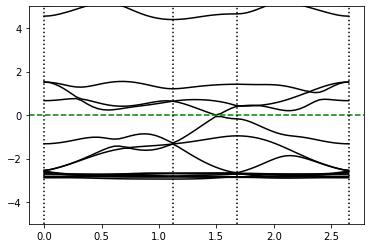

In [151]:
fig,ax=plt.subplots()
k=bp.path.get_linear_kpoint_axis()
e=bp.energies-bp.reference
for i in e[0].T:
    ax.plot(k[0],i,c="k")
# for i in e[1].T:
#     ax.plot(k[0],i,c="r")    
ax.set_ylim(-5,5)
ax.axhline(0,c="g",ls="--")
for i in k[1]:
    ax.axvline(i,c="k",ls=":")
plt.show()

(-5.0, 5.0)

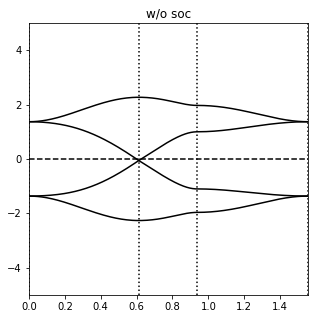

In [259]:
from pysktb import *
theta=np.deg2rad(4)
h=np.sin(theta)*np.cos(theta)
a=Atom("a",[1./3.,1./3.,2+h/10])
a.set_orbitals(["px","py","pz"])
b=Atom("b",[2./3.,2./3.,2-h/10])
b.set_orbitals(["px","py","pz"])
atoms=[a,b]
# lattice(plat,alat)
lattice=Lattice([[1.0,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10/np.cos(theta)]],np.cos(theta))

# SK interaction values 
d=-10
vp=-0.3
vps=1.3
interactions={"a":{"e_p":[0,0,-d],"lambda":0}
    ,"b":{"e_p":[0,0,-d],"lambda":0},
    "ab":{"V_ppp":vp,"V_pps":vps},
    "bb":{"V_ppp":vp,"V_pps":vps},
    "aa":{"V_ppp":vp,"V_pps":vps}}

#NN distance for each pair
bond={"ab":{"NN":1},
      "aa":{"NN":0},
      "bb":{"NN":0}}

# defining the structure class
s=Structure(lattice,atoms,bond_cut=bond)

# defining the hameltonian with interactions
ham=Hamiltonian(s,interactions)


# solve it along a path

path=[[0.,0.,0],[2./3.,1./3.,0],[.5,.5,0],[0.,0.,0]]
k_path, k_dist,k_pts=ham.get_kpts(path,100)

evals_soc = []
evals = []
for kpt in k_path:
        H = ham.get_ham(np.array(kpt))
        eigs = np.linalg.eigvalsh(H)
        evals_soc.append(eigs)
        
        H = ham.get_ham(np.array(kpt),l_soc=False)
        eigs = np.linalg.eigvalsh(H)
        evals.append(eigs)

evals = np.array(evals).T
evals_soc = np.array(evals_soc).T

fig,ax=plt.subplots(1,1,figsize=(5,5))
for axis in range(1):
    if axis==0:
        e=evals;title="w/o soc"
    else:e=evals_soc;title="soc"
    for i in e:ax.plot(k_dist,i,c="k")
    for i in k_pts:ax.axvline(i,c="k",ls=":")
    ax.axhline(0,c="k",ls="--")
    ax.set_xlim(k_pts.min(),k_pts.max())
    ax.set_title(title)
ax.set_ylim(-5,5)

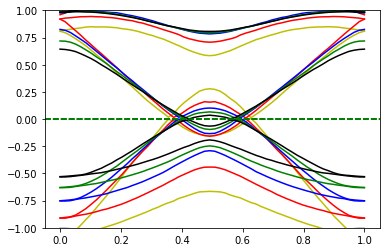

In [147]:

def plot_bands(ax,fname="ab-initio/bands_data.pickle",c="k"):
    bp=pickle.load(open(fname,"rb"))
    k=bp.path.get_linear_kpoint_axis()
    x=np.linspace(0,1,len(k[0]))
    e=bp.energies-bp.reference
    for i in e[0].T:
        ax.plot(x,i,c=c)
#     for i in e[1].T:
#         ax.plot(k[0],i,c="r")    
    ax.set_ylim(-1,1)
    ax.axhline(0,c="g",ls="--")
#     for i in k[1]:
#         ax.axvline(i,c="k",ls=":")
fig,ax=plt.subplots()
plot_bands(ax,fname="ab-initio/bands_data0.050000.pickle",c="y")
plot_bands(ax,fname="ab-initio/bands_data0.100000.pickle",c="r")
plot_bands(ax,fname="ab-initio/bands_data0.150000.pickle",c="b")
plot_bands(ax,fname="ab-initio/bands_data0.200000.pickle",c="g")
plot_bands(ax,fname="ab-initio/bands_data0.250000.pickle",c="k")

In [260]:
from ase.io import read,write
from pymatgen.io.ase import AseAtomsAdaptor as p2ase
from ase import Atoms

In [148]:
atom=read("ab-initio/gdn2.cif")
s=p2ase().get_structure(atom)
strain=0.3
s.apply_strain([strain,strain,strain])
atom=p2ase().get_atoms(s)
write("ab-initio/strain.cif",atom)
print((s[1].coords-s[2].coords)[2])
print(s.get_distance(1,2))

2.2415119999999984
3.5906948830994536


In [3]:
atom=read("ab-initio/gdn2.cif")
abc=list(atom.cell.lengths())
abc.extend(list(atom.cell.angles()))
abc[-1]=60
strain=0.8
c=abc[2]
abc[0]*=strain;abc[1]*=strain;abc[2]*=(1+strain)
print(abc)
a=Atoms("GdN2")
a.set_scaled_positions(atom.get_scaled_positions())
a.set_cell(abc)
pos=a.get_positions()
a.set_positions(pos)
write("ab-initio/strain.cif",a)
print(c)

[2.98992, 2.9899200000000006, 36.0, 90.0, 90.0, 60]
20.0


In [9]:
def apply_strain(strain=0.8):
    atom=read("ab-initio/gdn2.cif")
    abc=list(atom.cell.lengths())
    abc.extend(list(atom.cell.angles()))
    abc[-1]=60
    c=abc[2]
    strain-=1
    abc[0]*=strain;abc[1]*=strain;#abc[2]*=(1+strain)
    atom.set_cell(abc, scale_atoms=True)
    write("ab-initio/strain.cif",atom)
apply_strain(0.3)
!open ab-initio/strain.cif

In [261]:
import pymatgen as p